# Importing 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# # Opening the data file
df = pd.read_csv('https://raw.githubusercontent.com/ShamilaWije/DataStorm3/main/train_data.csv')
vd = pd.read_csv('https://raw.githubusercontent.com/ShamilaWije/DataStorm3/main/validation_data.csv')
td = pd.read_csv('https://raw.githubusercontent.com/ShamilaWije/DataStorm3/main/test_data.csv')
# df = pd.read_csv('train_data.csv')
# vd = pd.read_csv('validation_data.csv')
# td = pd.read_csv('test_data.csv')
df

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,117610,11/6/2021,7
1,category_4,836584,11/18/2021,16
2,category_1,370195,1/24/2022,6
3,category_2,172582,10/30/2021,5
4,category_2,1006009,10/30/2021,5
...,...,...,...,...
19916,category_2,225259,10/4/2021,4
19917,category_2,111436,10/12/2021,1
19918,category_2,1098502,10/1/2021,1
19919,category_2,20824,10/1/2021,7


# First look

In [3]:
df.describe()

,ItemCode,DailySales
count,1.992100e+04,19921.000000
mean,6.110610e+05,7.351890
std,4.549868e+05,14.605342
min,3.418000e+03,1.000000
25%,1.176100e+05,2.000000
50%,8.379430e+05,3.000000
75%,1.058713e+06,7.000000
max,1.105027e+06,434.000000


In [4]:
df['DateID'] = pd.to_datetime(df['DateID'])

In [5]:
df = df.sort_values('DateID')
df = df.reset_index(drop = True)
df

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,174436,2021-10-01,9
1,category_2,118033,2021-10-01,4
2,category_2,20824,2021-10-01,7
3,category_1,1061341,2021-10-01,11
4,category_1,76399,2021-10-01,14
...,...,...,...,...
19916,category_2,57058,2022-02-13,3
19917,category_1,1084498,2022-02-13,4
19918,category_2,1067092,2022-02-13,13
19919,category_1,755584,2022-02-13,2


# Sorting data

In [6]:
df = df[(df['DateID'] >= '2021-10-04')]
df

,CategoryCode,ItemCode,DateID,DailySales
455,category_4,1024810,2021-10-04,6
456,category_2,59749,2021-10-04,3
457,category_1,370195,2021-10-04,1
458,category_2,1064473,2021-10-04,6
459,category_1,1081321,2021-10-04,3
...,...,...,...,...
19916,category_2,57058,2022-02-13,3
19917,category_1,1084498,2022-02-13,4
19918,category_2,1067092,2022-02-13,13
19919,category_1,755584,2022-02-13,2


In [7]:
df = df.reset_index(drop = True)
df

,CategoryCode,ItemCode,DateID,DailySales
0,category_4,1024810,2021-10-04,6
1,category_2,59749,2021-10-04,3
2,category_1,370195,2021-10-04,1
3,category_2,1064473,2021-10-04,6
4,category_1,1081321,2021-10-04,3
...,...,...,...,...
19461,category_2,57058,2022-02-13,3
19462,category_1,1084498,2022-02-13,4
19463,category_2,1067092,2022-02-13,13
19464,category_1,755584,2022-02-13,2


**check unique values in dataset**

In [8]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

CategoryCode      4
ItemCode        194
DateID          133
DailySales      159
dtype: int64

**Check for null values**

In [9]:
# check for null values
df.isnull().sum()

CategoryCode    0
ItemCode        0
DateID          0
DailySales      0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['CategoryCode'])
df

,CategoryCode,ItemCode,DateID,DailySales,Category
0,category_4,1024810,2021-10-04,6,3
1,category_2,59749,2021-10-04,3,1
2,category_1,370195,2021-10-04,1,0
3,category_2,1064473,2021-10-04,6,1
4,category_1,1081321,2021-10-04,3,0
...,...,...,...,...,...
19461,category_2,57058,2022-02-13,3,1
19462,category_1,1084498,2022-02-13,4,0
19463,category_2,1067092,2022-02-13,13,1
19464,category_1,755584,2022-02-13,2,0


In [11]:
df['DateID'].dt.day

0         4
1         4
2         4
3         4
4         4
         ..
19461    13
19462    13
19463    13
19464    13
19465    13
Name: DateID, Length: 19466, dtype: int64

In [12]:
def week_num(tgtdate):
    wDay = df.iloc[0,2]
    return(tgtdate-wDay).days//7 +1


In [13]:
df['Week'] = df['DateID'].apply(lambda x : week_num(x))

In [14]:
df

,CategoryCode,ItemCode,DateID,DailySales,Category,Week
0,category_4,1024810,2021-10-04,6,3,1
1,category_2,59749,2021-10-04,3,1,1
2,category_1,370195,2021-10-04,1,0,1
3,category_2,1064473,2021-10-04,6,1,1
4,category_1,1081321,2021-10-04,3,0,1
...,...,...,...,...,...,...
19461,category_2,57058,2022-02-13,3,1,19
19462,category_1,1084498,2022-02-13,4,0,19
19463,category_2,1067092,2022-02-13,13,1,19
19464,category_1,755584,2022-02-13,2,0,19


In [15]:
df = df.groupby(['Week', 'ItemCode', 'Category']).DailySales.agg([sum]).reset_index()
df

,Week,ItemCode,Category,sum
0,1,3418,0,42
1,1,3427,0,40
2,1,7666,2,119
3,1,9925,1,9
4,1,16936,2,25
...,...,...,...,...
3588,19,1101769,1,33
3589,19,1103056,1,10
3590,19,1105009,1,11
3591,19,1105018,1,6


In [16]:
df = df.rename(columns={'sum': 'Sales'})
df

,Week,ItemCode,Category,Sales
0,1,3418,0,42
1,1,3427,0,40
2,1,7666,2,119
3,1,9925,1,9
4,1,16936,2,25
...,...,...,...,...
3588,19,1101769,1,33
3589,19,1103056,1,10
3590,19,1105009,1,11
3591,19,1105018,1,6


In [17]:
df['Category'].value_counts()

1    1665
0    1246
2     413
3     269
Name: Category, dtype: int64

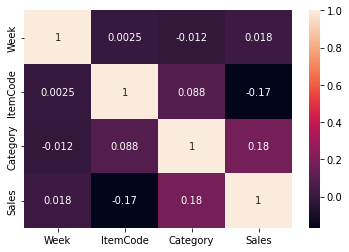

In [18]:
cor = df.corr()
sns.heatmap(cor, annot=True)

In [19]:
fvd = vd.pivot_table(index='Week', values='WeeklySales', columns ='ItemCode', fill_value=0 ,aggfunc=sum).reset_index()
fvd

ItemCode,Week,3418,3427,7666,17287,17296,20824,23569,24136,30877,...,1090114,1090240,1090276,1090294,1090303,1097143,1098493,1098502,1101661,1105009
0,w1,25,7,48,57,366,137,20,20,65,...,3,3,3,11,19,43,10,7,64,11
1,w2,69,56,16,60,514,150,60,56,93,...,11,8,4,32,11,47,8,6,69,10
2,w3,120,72,0,83,728,148,2,37,107,...,11,13,6,12,14,32,9,7,54,10
3,w4,69,33,17,64,771,220,20,44,118,...,11,8,10,29,14,27,9,4,88,19


In [20]:
fdf = df.pivot_table(index='Week', values='Sales', columns ='ItemCode',fill_value=0, aggfunc=sum).reset_index()
fdf

ItemCode,Week,3418,3427,7666,9925,16936,17287,17296,20824,23200,...,1098502,1101553,1101562,1101571,1101661,1101769,1103056,1105009,1105018,1105027
0,1,42,40,119,9,25,16,274,144,7,...,8,11,9,7,22,3,0,0,0,0
1,2,41,20,196,11,40,6,438,123,33,...,7,10,8,18,26,0,8,0,0,0
2,3,41,48,185,13,31,10,276,112,7,...,4,5,10,7,14,0,12,5,0,0
3,4,44,54,94,5,21,21,485,103,64,...,9,3,19,6,41,18,28,5,3,3
4,5,46,28,15,11,43,21,578,163,80,...,3,5,4,7,23,20,27,10,6,11
5,6,43,36,10,11,7,12,643,284,61,...,9,9,13,3,14,22,20,17,11,10
6,7,49,52,30,13,34,20,540,140,30,...,3,5,9,8,45,17,17,17,4,7
7,8,54,42,79,12,151,10,580,134,108,...,9,6,10,4,38,14,24,4,7,16
8,9,69,57,82,10,32,24,435,115,163,...,9,3,0,3,27,1,19,6,8,13
9,10,101,46,141,21,28,23,595,122,195,...,4,16,7,2,26,0,12,9,6,10


# Geting traing data ready to train

In [21]:
item = list(fdf.columns)
item.pop(0)
print(len(item))

194


In [22]:
ffdf = pd.concat([fdf['Week'],fdf[item].cumsum()], axis=1)
ffdf

,Week,3418,3427,7666,9925,16936,17287,17296,20824,23200,...,1098502,1101553,1101562,1101571,1101661,1101769,1103056,1105009,1105018,1105027
0,1,42,40,119,9,25,16,274,144,7,...,8,11,9,7,22,3,0,0,0,0
1,2,83,60,315,20,65,22,712,267,40,...,15,21,17,25,48,3,8,0,0,0
2,3,124,108,500,33,96,32,988,379,47,...,19,26,27,32,62,3,20,5,0,0
3,4,168,162,594,38,117,53,1473,482,111,...,28,29,46,38,103,21,48,10,3,3
4,5,214,190,609,49,160,74,2051,645,191,...,31,34,50,45,126,41,75,20,9,14
5,6,257,226,619,60,167,86,2694,929,252,...,40,43,63,48,140,63,95,37,20,24
6,7,306,278,649,73,201,106,3234,1069,282,...,43,48,72,56,185,80,112,54,24,31
7,8,360,320,728,85,352,116,3814,1203,390,...,52,54,82,60,223,94,136,58,31,47
8,9,429,377,810,95,384,140,4249,1318,553,...,61,57,82,63,250,95,155,64,39,60
9,10,530,423,951,116,412,163,4844,1440,748,...,65,73,89,65,276,95,167,73,45,70


In [23]:
ffdf[1044691]

0      13
1      29
2      40
3      60
4      73
5      85
6     107
7     135
8     162
9     185
10    200
11    208
12    230
13    255
14    280
15    297
16    309
17    332
18    355
Name: 1044691, dtype: int64

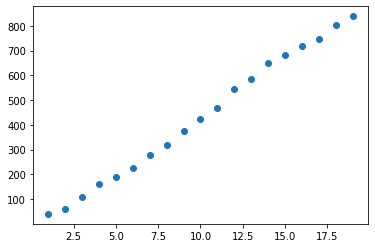

In [24]:
plt.scatter(ffdf['Week'],ffdf[item[1]])

In [25]:
ca = pd.concat([ ffdf['Week'],ffdf[item[1]] ], axis=1)
ca

,Week,3427
0,1,40
1,2,60
2,3,108
3,4,162
4,5,190
5,6,226
6,7,278
7,8,320
8,9,377
9,10,423


# **Pain**    (creating models)

Sklearn

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
nnn =0
for i in range(len(item)):
  print(f"L{item[i]} = LinearRegression(fit_intercept=False) \nL{item[i]}.fit(ca[['Week']],ffdf[[item[{nnn}]]])\n") 
  nnn = nnn + 1

L3418 = LinearRegression(fit_intercept=False) 
L3418.fit(ca[['Week']],ffdf[[item[0]]])

L3427 = LinearRegression(fit_intercept=False) 
L3427.fit(ca[['Week']],ffdf[[item[1]]])

L7666 = LinearRegression(fit_intercept=False) 
L7666.fit(ca[['Week']],ffdf[[item[2]]])

L9925 = LinearRegression(fit_intercept=False) 
L9925.fit(ca[['Week']],ffdf[[item[3]]])

L16936 = LinearRegression(fit_intercept=False) 
L16936.fit(ca[['Week']],ffdf[[item[4]]])

L17287 = LinearRegression(fit_intercept=False) 
L17287.fit(ca[['Week']],ffdf[[item[5]]])

L17296 = LinearRegression(fit_intercept=False) 
L17296.fit(ca[['Week']],ffdf[[item[6]]])

L20824 = LinearRegression(fit_intercept=False) 
L20824.fit(ca[['Week']],ffdf[[item[7]]])

L23200 = LinearRegression(fit_intercept=False) 
L23200.fit(ca[['Week']],ffdf[[item[8]]])

L23569 = LinearRegression(fit_intercept=False) 
L23569.fit(ca[['Week']],ffdf[[item[9]]])

L24136 = LinearRegression(fit_intercept=False) 
L24136.fit(ca[['Week']],ffdf[[item[10]]])

L30877 = LinearRe

In [28]:
L3418 = LinearRegression(fit_intercept=False) 
L3418.fit(ca[['Week']],ffdf[[item[0]]])

L3427 = LinearRegression(fit_intercept=False) 
L3427.fit(ca[['Week']],ffdf[[item[1]]])

L7666 = LinearRegression(fit_intercept=False) 
L7666.fit(ca[['Week']],ffdf[[item[2]]])

L9925 = LinearRegression(fit_intercept=False) 
L9925.fit(ca[['Week']],ffdf[[item[3]]])

L16936 = LinearRegression(fit_intercept=False) 
L16936.fit(ca[['Week']],ffdf[[item[4]]])

L17287 = LinearRegression(fit_intercept=False) 
L17287.fit(ca[['Week']],ffdf[[item[5]]])

L17296 = LinearRegression(fit_intercept=False) 
L17296.fit(ca[['Week']],ffdf[[item[6]]])

L20824 = LinearRegression(fit_intercept=False) 
L20824.fit(ca[['Week']],ffdf[[item[7]]])

L23200 = LinearRegression(fit_intercept=False) 
L23200.fit(ca[['Week']],ffdf[[item[8]]])

L23569 = LinearRegression(fit_intercept=False) 
L23569.fit(ca[['Week']],ffdf[[item[9]]])

L24136 = LinearRegression(fit_intercept=False) 
L24136.fit(ca[['Week']],ffdf[[item[10]]])

L30877 = LinearRegression(fit_intercept=False) 
L30877.fit(ca[['Week']],ffdf[[item[11]]])

L32245 = LinearRegression(fit_intercept=False) 
L32245.fit(ca[['Week']],ffdf[[item[12]]])

L35449 = LinearRegression(fit_intercept=False) 
L35449.fit(ca[['Week']],ffdf[[item[13]]])

L35530 = LinearRegression(fit_intercept=False) 
L35530.fit(ca[['Week']],ffdf[[item[14]]])

L35584 = LinearRegression(fit_intercept=False) 
L35584.fit(ca[['Week']],ffdf[[item[15]]])

L36898 = LinearRegression(fit_intercept=False) 
L36898.fit(ca[['Week']],ffdf[[item[16]]])

L37510 = LinearRegression(fit_intercept=False) 
L37510.fit(ca[['Week']],ffdf[[item[17]]])

L37861 = LinearRegression(fit_intercept=False) 
L37861.fit(ca[['Week']],ffdf[[item[18]]])

L38518 = LinearRegression(fit_intercept=False) 
L38518.fit(ca[['Week']],ffdf[[item[19]]])

L39436 = LinearRegression(fit_intercept=False) 
L39436.fit(ca[['Week']],ffdf[[item[20]]])

L40759 = LinearRegression(fit_intercept=False) 
L40759.fit(ca[['Week']],ffdf[[item[21]]])

L41830 = LinearRegression(fit_intercept=False) 
L41830.fit(ca[['Week']],ffdf[[item[22]]])

L42424 = LinearRegression(fit_intercept=False) 
L42424.fit(ca[['Week']],ffdf[[item[23]]])

L42496 = LinearRegression(fit_intercept=False) 
L42496.fit(ca[['Week']],ffdf[[item[24]]])

L43630 = LinearRegression(fit_intercept=False) 
L43630.fit(ca[['Week']],ffdf[[item[25]]])

L43657 = LinearRegression(fit_intercept=False) 
L43657.fit(ca[['Week']],ffdf[[item[26]]])

L43738 = LinearRegression(fit_intercept=False) 
L43738.fit(ca[['Week']],ffdf[[item[27]]])

L48940 = LinearRegression(fit_intercept=False) 
L48940.fit(ca[['Week']],ffdf[[item[28]]])

L50785 = LinearRegression(fit_intercept=False) 
L50785.fit(ca[['Week']],ffdf[[item[29]]])

L57058 = LinearRegression(fit_intercept=False) 
L57058.fit(ca[['Week']],ffdf[[item[30]]])

L59047 = LinearRegression(fit_intercept=False) 
L59047.fit(ca[['Week']],ffdf[[item[31]]])

L59749 = LinearRegression(fit_intercept=False) 
L59749.fit(ca[['Week']],ffdf[[item[32]]])

L64978 = LinearRegression(fit_intercept=False) 
L64978.fit(ca[['Week']],ffdf[[item[33]]])

L65788 = LinearRegression(fit_intercept=False) 
L65788.fit(ca[['Week']],ffdf[[item[34]]])

L75886 = LinearRegression(fit_intercept=False) 
L75886.fit(ca[['Week']],ffdf[[item[35]]])

L76399 = LinearRegression(fit_intercept=False) 
L76399.fit(ca[['Week']],ffdf[[item[36]]])

L86974 = LinearRegression(fit_intercept=False) 
L86974.fit(ca[['Week']],ffdf[[item[37]]])

L86992 = LinearRegression(fit_intercept=False) 
L86992.fit(ca[['Week']],ffdf[[item[38]]])

L87046 = LinearRegression(fit_intercept=False) 
L87046.fit(ca[['Week']],ffdf[[item[39]]])

L87559 = LinearRegression(fit_intercept=False) 
L87559.fit(ca[['Week']],ffdf[[item[40]]])

L88450 = LinearRegression(fit_intercept=False) 
L88450.fit(ca[['Week']],ffdf[[item[41]]])

L99079 = LinearRegression(fit_intercept=False) 
L99079.fit(ca[['Week']],ffdf[[item[42]]])

L110320 = LinearRegression(fit_intercept=False) 
L110320.fit(ca[['Week']],ffdf[[item[43]]])

L111382 = LinearRegression(fit_intercept=False) 
L111382.fit(ca[['Week']],ffdf[[item[44]]])

L111436 = LinearRegression(fit_intercept=False) 
L111436.fit(ca[['Week']],ffdf[[item[45]]])

L117610 = LinearRegression(fit_intercept=False) 
L117610.fit(ca[['Week']],ffdf[[item[46]]])

L118033 = LinearRegression(fit_intercept=False) 
L118033.fit(ca[['Week']],ffdf[[item[47]]])

L119554 = LinearRegression(fit_intercept=False) 
L119554.fit(ca[['Week']],ffdf[[item[48]]])

L123307 = LinearRegression(fit_intercept=False) 
L123307.fit(ca[['Week']],ffdf[[item[49]]])

L124774 = LinearRegression(fit_intercept=False) 
L124774.fit(ca[['Week']],ffdf[[item[50]]])

L124954 = LinearRegression(fit_intercept=False) 
L124954.fit(ca[['Week']],ffdf[[item[51]]])

L130993 = LinearRegression(fit_intercept=False) 
L130993.fit(ca[['Week']],ffdf[[item[52]]])

L131983 = LinearRegression(fit_intercept=False) 
L131983.fit(ca[['Week']],ffdf[[item[53]]])

L132028 = LinearRegression(fit_intercept=False) 
L132028.fit(ca[['Week']],ffdf[[item[54]]])

L132334 = LinearRegression(fit_intercept=False) 
L132334.fit(ca[['Week']],ffdf[[item[55]]])

L138742 = LinearRegression(fit_intercept=False) 
L138742.fit(ca[['Week']],ffdf[[item[56]]])

L142756 = LinearRegression(fit_intercept=False) 
L142756.fit(ca[['Week']],ffdf[[item[57]]])

L145330 = LinearRegression(fit_intercept=False) 
L145330.fit(ca[['Week']],ffdf[[item[58]]])

L145978 = LinearRegression(fit_intercept=False) 
L145978.fit(ca[['Week']],ffdf[[item[59]]])

L169504 = LinearRegression(fit_intercept=False) 
L169504.fit(ca[['Week']],ffdf[[item[60]]])

L172033 = LinearRegression(fit_intercept=False) 
L172033.fit(ca[['Week']],ffdf[[item[61]]])

L172582 = LinearRegression(fit_intercept=False) 
L172582.fit(ca[['Week']],ffdf[[item[62]]])

L173617 = LinearRegression(fit_intercept=False) 
L173617.fit(ca[['Week']],ffdf[[item[63]]])

L174436 = LinearRegression(fit_intercept=False) 
L174436.fit(ca[['Week']],ffdf[[item[64]]])

L210868 = LinearRegression(fit_intercept=False) 
L210868.fit(ca[['Week']],ffdf[[item[65]]])

L211309 = LinearRegression(fit_intercept=False) 
L211309.fit(ca[['Week']],ffdf[[item[66]]])

L213802 = LinearRegression(fit_intercept=False) 
L213802.fit(ca[['Week']],ffdf[[item[67]]])

L216151 = LinearRegression(fit_intercept=False) 
L216151.fit(ca[['Week']],ffdf[[item[68]]])

L225259 = LinearRegression(fit_intercept=False) 
L225259.fit(ca[['Week']],ffdf[[item[69]]])

L245581 = LinearRegression(fit_intercept=False) 
L245581.fit(ca[['Week']],ffdf[[item[70]]])

L248272 = LinearRegression(fit_intercept=False) 
L248272.fit(ca[['Week']],ffdf[[item[71]]])

L262384 = LinearRegression(fit_intercept=False) 
L262384.fit(ca[['Week']],ffdf[[item[72]]])

L267478 = LinearRegression(fit_intercept=False) 
L267478.fit(ca[['Week']],ffdf[[item[73]]])

L267496 = LinearRegression(fit_intercept=False) 
L267496.fit(ca[['Week']],ffdf[[item[74]]])

L370195 = LinearRegression(fit_intercept=False) 
L370195.fit(ca[['Week']],ffdf[[item[75]]])

L371104 = LinearRegression(fit_intercept=False) 
L371104.fit(ca[['Week']],ffdf[[item[76]]])

L371239 = LinearRegression(fit_intercept=False) 
L371239.fit(ca[['Week']],ffdf[[item[77]]])

L379249 = LinearRegression(fit_intercept=False) 
L379249.fit(ca[['Week']],ffdf[[item[78]]])

L397213 = LinearRegression(fit_intercept=False) 
L397213.fit(ca[['Week']],ffdf[[item[79]]])

L399220 = LinearRegression(fit_intercept=False) 
L399220.fit(ca[['Week']],ffdf[[item[80]]])

L416212 = LinearRegression(fit_intercept=False) 
L416212.fit(ca[['Week']],ffdf[[item[81]]])

L687616 = LinearRegression(fit_intercept=False) 
L687616.fit(ca[['Week']],ffdf[[item[82]]])

L731104 = LinearRegression(fit_intercept=False) 
L731104.fit(ca[['Week']],ffdf[[item[83]]])

L745945 = LinearRegression(fit_intercept=False) 
L745945.fit(ca[['Week']],ffdf[[item[84]]])

L753613 = LinearRegression(fit_intercept=False) 
L753613.fit(ca[['Week']],ffdf[[item[85]]])

L755584 = LinearRegression(fit_intercept=False) 
L755584.fit(ca[['Week']],ffdf[[item[86]]])

L815101 = LinearRegression(fit_intercept=False) 
L815101.fit(ca[['Week']],ffdf[[item[87]]])

L836125 = LinearRegression(fit_intercept=False) 
L836125.fit(ca[['Week']],ffdf[[item[88]]])

L836152 = LinearRegression(fit_intercept=False) 
L836152.fit(ca[['Week']],ffdf[[item[89]]])

L836584 = LinearRegression(fit_intercept=False) 
L836584.fit(ca[['Week']],ffdf[[item[90]]])

L837943 = LinearRegression(fit_intercept=False) 
L837943.fit(ca[['Week']],ffdf[[item[91]]])

L838456 = LinearRegression(fit_intercept=False) 
L838456.fit(ca[['Week']],ffdf[[item[92]]])

L839356 = LinearRegression(fit_intercept=False) 
L839356.fit(ca[['Week']],ffdf[[item[93]]])

L839374 = LinearRegression(fit_intercept=False) 
L839374.fit(ca[['Week']],ffdf[[item[94]]])

L858886 = LinearRegression(fit_intercept=False) 
L858886.fit(ca[['Week']],ffdf[[item[95]]])

L865933 = LinearRegression(fit_intercept=False) 
L865933.fit(ca[['Week']],ffdf[[item[96]]])

L872260 = LinearRegression(fit_intercept=False) 
L872260.fit(ca[['Week']],ffdf[[item[97]]])

L877624 = LinearRegression(fit_intercept=False) 
L877624.fit(ca[['Week']],ffdf[[item[98]]])

L893824 = LinearRegression(fit_intercept=False) 
L893824.fit(ca[['Week']],ffdf[[item[99]]])

L903976 = LinearRegression(fit_intercept=False) 
L903976.fit(ca[['Week']],ffdf[[item[100]]])

L906586 = LinearRegression(fit_intercept=False) 
L906586.fit(ca[['Week']],ffdf[[item[101]]])

L906595 = LinearRegression(fit_intercept=False) 
L906595.fit(ca[['Week']],ffdf[[item[102]]])

L913561 = LinearRegression(fit_intercept=False) 
L913561.fit(ca[['Week']],ffdf[[item[103]]])

L999403 = LinearRegression(fit_intercept=False) 
L999403.fit(ca[['Week']],ffdf[[item[104]]])

L1003147 = LinearRegression(fit_intercept=False) 
L1003147.fit(ca[['Week']],ffdf[[item[105]]])

L1003156 = LinearRegression(fit_intercept=False) 
L1003156.fit(ca[['Week']],ffdf[[item[106]]])

L1003183 = LinearRegression(fit_intercept=False) 
L1003183.fit(ca[['Week']],ffdf[[item[107]]])

L1003192 = LinearRegression(fit_intercept=False) 
L1003192.fit(ca[['Week']],ffdf[[item[108]]])

L1006009 = LinearRegression(fit_intercept=False) 
L1006009.fit(ca[['Week']],ffdf[[item[109]]])

L1006090 = LinearRegression(fit_intercept=False) 
L1006090.fit(ca[['Week']],ffdf[[item[110]]])

L1006099 = LinearRegression(fit_intercept=False) 
L1006099.fit(ca[['Week']],ffdf[[item[111]]])

L1006108 = LinearRegression(fit_intercept=False) 
L1006108.fit(ca[['Week']],ffdf[[item[112]]])

L1010068 = LinearRegression(fit_intercept=False) 
L1010068.fit(ca[['Week']],ffdf[[item[113]]])

L1013335 = LinearRegression(fit_intercept=False) 
L1013335.fit(ca[['Week']],ffdf[[item[114]]])

L1015621 = LinearRegression(fit_intercept=False) 
L1015621.fit(ca[['Week']],ffdf[[item[115]]])

L1021264 = LinearRegression(fit_intercept=False) 
L1021264.fit(ca[['Week']],ffdf[[item[116]]])

L1024810 = LinearRegression(fit_intercept=False) 
L1024810.fit(ca[['Week']],ffdf[[item[117]]])

L1026871 = LinearRegression(fit_intercept=False) 
L1026871.fit(ca[['Week']],ffdf[[item[118]]])

L1030948 = LinearRegression(fit_intercept=False) 
L1030948.fit(ca[['Week']],ffdf[[item[119]]])

L1032532 = LinearRegression(fit_intercept=False) 
L1032532.fit(ca[['Week']],ffdf[[item[120]]])

L1032541 = LinearRegression(fit_intercept=False) 
L1032541.fit(ca[['Week']],ffdf[[item[121]]])

L1032550 = LinearRegression(fit_intercept=False) 
L1032550.fit(ca[['Week']],ffdf[[item[122]]])

L1032559 = LinearRegression(fit_intercept=False) 
L1032559.fit(ca[['Week']],ffdf[[item[123]]])

L1032568 = LinearRegression(fit_intercept=False) 
L1032568.fit(ca[['Week']],ffdf[[item[124]]])

L1032586 = LinearRegression(fit_intercept=False) 
L1032586.fit(ca[['Week']],ffdf[[item[125]]])

L1044502 = LinearRegression(fit_intercept=False) 
L1044502.fit(ca[['Week']],ffdf[[item[126]]])

L1044610 = LinearRegression(fit_intercept=False) 
L1044610.fit(ca[['Week']],ffdf[[item[127]]])

L1044619 = LinearRegression(fit_intercept=False) 
L1044619.fit(ca[['Week']],ffdf[[item[128]]])

L1044682 = LinearRegression(fit_intercept=False) 
L1044682.fit(ca[['Week']],ffdf[[item[129]]])

L1044691 = LinearRegression(fit_intercept=False) 
L1044691.fit(ca[['Week']],ffdf[[item[130]]])

L1047130 = LinearRegression(fit_intercept=False) 
L1047130.fit(ca[['Week']],ffdf[[item[131]]])

L1047967 = LinearRegression(fit_intercept=False) 
L1047967.fit(ca[['Week']],ffdf[[item[132]]])

L1048975 = LinearRegression(fit_intercept=False) 
L1048975.fit(ca[['Week']],ffdf[[item[133]]])

L1049776 = LinearRegression(fit_intercept=False) 
L1049776.fit(ca[['Week']],ffdf[[item[134]]])

L1050046 = LinearRegression(fit_intercept=False) 
L1050046.fit(ca[['Week']],ffdf[[item[135]]])

L1054978 = LinearRegression(fit_intercept=False) 
L1054978.fit(ca[['Week']],ffdf[[item[136]]])

L1056463 = LinearRegression(fit_intercept=False) 
L1056463.fit(ca[['Week']],ffdf[[item[137]]])

L1058713 = LinearRegression(fit_intercept=False) 
L1058713.fit(ca[['Week']],ffdf[[item[138]]])

L1060630 = LinearRegression(fit_intercept=False) 
L1060630.fit(ca[['Week']],ffdf[[item[139]]])

L1060909 = LinearRegression(fit_intercept=False) 
L1060909.fit(ca[['Week']],ffdf[[item[140]]])

L1061341 = LinearRegression(fit_intercept=False) 
L1061341.fit(ca[['Week']],ffdf[[item[141]]])

L1061638 = LinearRegression(fit_intercept=False) 
L1061638.fit(ca[['Week']],ffdf[[item[142]]])

L1063600 = LinearRegression(fit_intercept=False) 
L1063600.fit(ca[['Week']],ffdf[[item[143]]])

L1064473 = LinearRegression(fit_intercept=False) 
L1064473.fit(ca[['Week']],ffdf[[item[144]]])

L1064572 = LinearRegression(fit_intercept=False) 
L1064572.fit(ca[['Week']],ffdf[[item[145]]])

L1066570 = LinearRegression(fit_intercept=False) 
L1066570.fit(ca[['Week']],ffdf[[item[146]]])

L1067074 = LinearRegression(fit_intercept=False) 
L1067074.fit(ca[['Week']],ffdf[[item[147]]])

L1067092 = LinearRegression(fit_intercept=False) 
L1067092.fit(ca[['Week']],ffdf[[item[148]]])

L1067119 = LinearRegression(fit_intercept=False) 
L1067119.fit(ca[['Week']],ffdf[[item[149]]])

L1067128 = LinearRegression(fit_intercept=False) 
L1067128.fit(ca[['Week']],ffdf[[item[150]]])

L1068883 = LinearRegression(fit_intercept=False) 
L1068883.fit(ca[['Week']],ffdf[[item[151]]])

L1070818 = LinearRegression(fit_intercept=False) 
L1070818.fit(ca[['Week']],ffdf[[item[152]]])

L1070836 = LinearRegression(fit_intercept=False) 
L1070836.fit(ca[['Week']],ffdf[[item[153]]])

L1071106 = LinearRegression(fit_intercept=False) 
L1071106.fit(ca[['Week']],ffdf[[item[154]]])

L1071115 = LinearRegression(fit_intercept=False) 
L1071115.fit(ca[['Week']],ffdf[[item[155]]])

L1071124 = LinearRegression(fit_intercept=False) 
L1071124.fit(ca[['Week']],ffdf[[item[156]]])

L1074823 = LinearRegression(fit_intercept=False) 
L1074823.fit(ca[['Week']],ffdf[[item[157]]])

L1075651 = LinearRegression(fit_intercept=False) 
L1075651.fit(ca[['Week']],ffdf[[item[158]]])

L1076920 = LinearRegression(fit_intercept=False) 
L1076920.fit(ca[['Week']],ffdf[[item[159]]])

L1076929 = LinearRegression(fit_intercept=False) 
L1076929.fit(ca[['Week']],ffdf[[item[160]]])

L1076938 = LinearRegression(fit_intercept=False) 
L1076938.fit(ca[['Week']],ffdf[[item[161]]])

L1077118 = LinearRegression(fit_intercept=False) 
L1077118.fit(ca[['Week']],ffdf[[item[162]]])

L1081060 = LinearRegression(fit_intercept=False) 
L1081060.fit(ca[['Week']],ffdf[[item[163]]])

L1081069 = LinearRegression(fit_intercept=False) 
L1081069.fit(ca[['Week']],ffdf[[item[164]]])

L1081078 = LinearRegression(fit_intercept=False) 
L1081078.fit(ca[['Week']],ffdf[[item[165]]])

L1081087 = LinearRegression(fit_intercept=False) 
L1081087.fit(ca[['Week']],ffdf[[item[166]]])

L1081321 = LinearRegression(fit_intercept=False) 
L1081321.fit(ca[['Week']],ffdf[[item[167]]])

L1081339 = LinearRegression(fit_intercept=False) 
L1081339.fit(ca[['Week']],ffdf[[item[168]]])

L1082743 = LinearRegression(fit_intercept=False) 
L1082743.fit(ca[['Week']],ffdf[[item[169]]])

L1084498 = LinearRegression(fit_intercept=False) 
L1084498.fit(ca[['Week']],ffdf[[item[170]]])

L1085749 = LinearRegression(fit_intercept=False) 
L1085749.fit(ca[['Week']],ffdf[[item[171]]])

L1090024 = LinearRegression(fit_intercept=False) 
L1090024.fit(ca[['Week']],ffdf[[item[172]]])

L1090105 = LinearRegression(fit_intercept=False) 
L1090105.fit(ca[['Week']],ffdf[[item[173]]])

L1090114 = LinearRegression(fit_intercept=False) 
L1090114.fit(ca[['Week']],ffdf[[item[174]]])

L1090240 = LinearRegression(fit_intercept=False) 
L1090240.fit(ca[['Week']],ffdf[[item[175]]])

L1090249 = LinearRegression(fit_intercept=False) 
L1090249.fit(ca[['Week']],ffdf[[item[176]]])

L1090258 = LinearRegression(fit_intercept=False) 
L1090258.fit(ca[['Week']],ffdf[[item[177]]])

L1090276 = LinearRegression(fit_intercept=False) 
L1090276.fit(ca[['Week']],ffdf[[item[178]]])

L1090294 = LinearRegression(fit_intercept=False) 
L1090294.fit(ca[['Week']],ffdf[[item[179]]])

L1090303 = LinearRegression(fit_intercept=False) 
L1090303.fit(ca[['Week']],ffdf[[item[180]]])

L1092184 = LinearRegression(fit_intercept=False) 
L1092184.fit(ca[['Week']],ffdf[[item[181]]])

L1097143 = LinearRegression(fit_intercept=False) 
L1097143.fit(ca[['Week']],ffdf[[item[182]]])

L1098493 = LinearRegression(fit_intercept=False) 
L1098493.fit(ca[['Week']],ffdf[[item[183]]])

L1098502 = LinearRegression(fit_intercept=False) 
L1098502.fit(ca[['Week']],ffdf[[item[184]]])

L1101553 = LinearRegression(fit_intercept=False) 
L1101553.fit(ca[['Week']],ffdf[[item[185]]])

L1101562 = LinearRegression(fit_intercept=False) 
L1101562.fit(ca[['Week']],ffdf[[item[186]]])

L1101571 = LinearRegression(fit_intercept=False) 
L1101571.fit(ca[['Week']],ffdf[[item[187]]])

L1101661 = LinearRegression(fit_intercept=False) 
L1101661.fit(ca[['Week']],ffdf[[item[188]]])

L1101769 = LinearRegression(fit_intercept=False) 
L1101769.fit(ca[['Week']],ffdf[[item[189]]])

L1103056 = LinearRegression(fit_intercept=False) 
L1103056.fit(ca[['Week']],ffdf[[item[190]]])

L1105009 = LinearRegression(fit_intercept=False) 
L1105009.fit(ca[['Week']],ffdf[[item[191]]])

L1105018 = LinearRegression(fit_intercept=False) 
L1105018.fit(ca[['Week']],ffdf[[item[192]]])

L1105027 = LinearRegression(fit_intercept=False) 
L1105027.fit(ca[['Week']],ffdf[[item[193]]])



LinearRegression(fit_intercept=False)

# **__**

In [29]:
locals()['L' + str(item[190])].predict([[20]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[315.72469636]])

item 3418

In [30]:
theta_0 = L123307.intercept_

theta_1 = L123307.coef_
print(f"{theta_0}  {theta_1}")

0.0  [[473.27125506]]


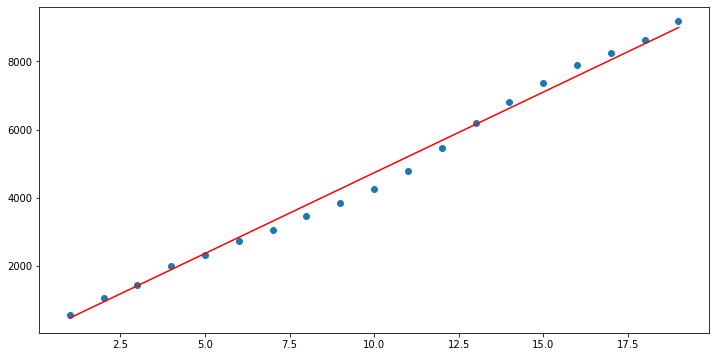

In [31]:
plt.figure(figsize=(12,6))
plt.scatter(ffdf['Week'], ffdf[123307])
plt.plot(ffdf['Week'],  float(theta_1)*ffdf['Week'] + float(theta_0), 'r')
plt.show()

# Validation data sorting 

In [32]:
vd

,CategoryCode,ItemCode,Week,WeeklySales
0,category_2,1044502,w1,11
1,category_2,1105009,w1,11
2,category_2,913561,w4,5
3,category_1,1048975,w4,30
4,category_1,17287,w2,60
...,...,...,...,...
365,category_2,124954,w2,43
366,category_2,40759,w1,48
367,category_1,1090303,w1,19
368,category_2,1090276,w3,6


In [33]:
vd.Week.replace("w1",20,inplace=True)
vd.Week.replace("w2",21,inplace=True)
vd.Week.replace("w3",22,inplace=True)
vd.Week.replace("w4",23,inplace=True)

In [34]:
vd

,CategoryCode,ItemCode,Week,WeeklySales
0,category_2,1044502,20,11
1,category_2,1105009,20,11
2,category_2,913561,23,5
3,category_1,1048975,23,30
4,category_1,17287,21,60
...,...,...,...,...
365,category_2,124954,21,43
366,category_2,40759,20,48
367,category_1,1090303,20,19
368,category_2,1090276,22,6


In [35]:
fvd = vd.pivot_table(index='Week', values='WeeklySales', columns ='ItemCode', aggfunc=sum).reset_index()
fvd

ItemCode,Week,3418,3427,7666,17287,17296,20824,23569,24136,30877,...,1090114,1090240,1090276,1090294,1090303,1097143,1098493,1098502,1101661,1105009
0,20,25.0,7.0,48.0,57.0,366.0,137.0,20.0,20.0,65.0,...,3.0,3.0,3.0,11.0,19.0,43.0,10.0,7.0,64.0,11.0
1,21,69.0,56.0,16.0,60.0,514.0,150.0,60.0,56.0,93.0,...,11.0,8.0,4.0,32.0,11.0,47.0,8.0,6.0,69.0,10.0
2,22,120.0,72.0,NaN,83.0,728.0,148.0,2.0,37.0,107.0,...,11.0,13.0,6.0,12.0,14.0,32.0,9.0,7.0,54.0,10.0
3,23,69.0,33.0,17.0,64.0,771.0,220.0,20.0,44.0,118.0,...,11.0,8.0,10.0,29.0,14.0,27.0,9.0,4.0,88.0,19.0


????

In [36]:
fvd = vd.pivot_table(index='Week', values='WeeklySales', columns ='ItemCode', fill_value=0 ,aggfunc=sum).reset_index()
fvd

ItemCode,Week,3418,3427,7666,17287,17296,20824,23569,24136,30877,...,1090114,1090240,1090276,1090294,1090303,1097143,1098493,1098502,1101661,1105009
0,20,25,7,48,57,366,137,20,20,65,...,3,3,3,11,19,43,10,7,64,11
1,21,69,56,16,60,514,150,60,56,93,...,11,8,4,32,11,47,8,6,69,10
2,22,120,72,0,83,728,148,2,37,107,...,11,13,6,12,14,32,9,7,54,10
3,23,69,33,17,64,771,220,20,44,118,...,11,8,10,29,14,27,9,4,88,19


In [37]:
# ffvd = pd.concat([fvd['Week'],fvd[item].cumsum()], axis=1)
# ffvd

In [38]:
td

,CategoryCode,ItemCode,Week,PredictedSales
0,category_1,43738,w4,NaN
1,category_2,1006090,w1,NaN
2,category_2,1076929,w4,NaN
3,category_1,1081321,w3,NaN
4,category_2,216151,w4,NaN
...,...,...,...,...
372,category_2,1101571,w1,NaN
373,category_2,1090258,w4,NaN
374,category_2,906595,w1,NaN
375,category_2,32245,w1,NaN


In [39]:
# td.Week.replace("w1",20,inplace=True)
# td.Week.replace("w2",21,inplace=True)
# td.Week.replace("w3",22,inplace=True)
# td.Week.replace("w4",23,inplace=True)

In [40]:
td

,CategoryCode,ItemCode,Week,PredictedSales
0,category_1,43738,w4,NaN
1,category_2,1006090,w1,NaN
2,category_2,1076929,w4,NaN
3,category_1,1081321,w3,NaN
4,category_2,216151,w4,NaN
...,...,...,...,...
372,category_2,1101571,w1,NaN
373,category_2,1090258,w4,NaN
374,category_2,906595,w1,NaN
375,category_2,32245,w1,NaN


In [41]:
def weekNum(x):
  if x == 'w1':
    return 20
  elif x == 'w2':
    return 21
  elif x == 'w3':
    return 22
  else:
    return 23

In [42]:
td['WeekNum'] = td['Week'].apply(lambda x: weekNum(x))

In [43]:
td

,CategoryCode,ItemCode,Week,PredictedSales,WeekNum
0,category_1,43738,w4,NaN,23
1,category_2,1006090,w1,NaN,20
2,category_2,1076929,w4,NaN,23
3,category_1,1081321,w3,NaN,22
4,category_2,216151,w4,NaN,23
...,...,...,...,...,...
372,category_2,1101571,w1,NaN,20
373,category_2,1090258,w4,NaN,23
374,category_2,906595,w1,NaN,20
375,category_2,32245,w1,NaN,20


In [44]:
td.index

RangeIndex(start=0, stop=377, step=1)

In [45]:
td['ItemCode'].unique()

array([  43738, 1006090, 1076929, 1081321,  216151, 1063600, 1082743,
         23200, 1068883,  838456, 1090258, 1032559,  123307,  837943,
       1067119, 1056463, 1101571, 1101769,  687616, 1071115, 1081339,
         87559, 1090024, 1044691,   65788, 1081069, 1044610,   42424,
        858886,  119554,  267478, 1075651,  169504, 1060630,   39436,
         57058,   87046,  906595,  753613,    9925,  815101,   37510,
        111436,   88450, 1070818,   32245,   37861, 1103056,  903976,
       1047967, 1105027,  893824,   86992,  999403,  111382, 1024810,
        370195,  371104,   36898, 1054978, 1081060,  174436,  262384,
       1032532,  872260, 1092184,  731104, 1085749,   42496,   41830,
        145978, 1021264,  839374, 1003192,   35530,  117610, 1077118,
       1049776,  132334, 1067074, 1101553,  225259, 1006099, 1081078,
        145330, 1105018,   43630, 1061341,  213802, 1101562, 1003183,
         38518, 1032568,   16936,  130993, 1067128,   35449])

In [46]:
td.iloc[0][0]

'category_1'

In [47]:
td['PredictedSales'] 

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
372   NaN
373   NaN
374   NaN
375   NaN
376   NaN
Name: PredictedSales, Length: 377, dtype: float64

In [48]:
int(td.iloc[0][4])

23

# Predicting Sales

In [49]:
for x in range(377):
  ss = locals()['L' + str(int(td.iloc[x][1]))].predict([[int(td.iloc[x][4])]])
  sss = locals()['L' + str(int(td.iloc[x][1]))].predict([[int(td.iloc[x][4])-1]])
  td.iat[x,3] = float(ss - sss)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

In [50]:
int(4.6)

4

In [51]:
td

,CategoryCode,ItemCode,Week,PredictedSales,WeekNum
0,category_1,43738,w4,15.751417,23
1,category_2,1006090,w1,17.189879,20
2,category_2,1076929,w4,9.983806,23
3,category_1,1081321,w3,17.211741,22
4,category_2,216151,w4,16.837652,23
...,...,...,...,...,...
372,category_2,1101571,w1,16.894737,20
373,category_2,1090258,w4,23.755466,23
374,category_2,906595,w1,8.617004,20
375,category_2,32245,w1,37.077733,20


In [52]:
def proper_round(num, dec=0):
    num = str(num)[:str(num).index('.')+dec+2]
    if num[-1]>='5':
        return float(num[:-2-(not dec)]+str(int(num[-2-(not dec)])+1))
    return float(num[:-1])

In [53]:
proper_round(2.5)

3.0

In [54]:
td['fPredictedSales'] = td.PredictedSales.apply(lambda x: proper_round(x))
td

,CategoryCode,ItemCode,Week,PredictedSales,WeekNum,fPredictedSales
0,category_1,43738,w4,15.751417,23,16.0
1,category_2,1006090,w1,17.189879,20,17.0
2,category_2,1076929,w4,9.983806,23,10.0
3,category_1,1081321,w3,17.211741,22,17.0
4,category_2,216151,w4,16.837652,23,17.0
...,...,...,...,...,...,...
372,category_2,1101571,w1,16.894737,20,17.0
373,category_2,1090258,w4,23.755466,23,24.0
374,category_2,906595,w1,8.617004,20,9.0
375,category_2,32245,w1,37.077733,20,37.0


In [55]:
td['fPredictedSales'] = td['fPredictedSales'].astype(str).apply(lambda x: x.replace('.0',''))

In [56]:
td

,CategoryCode,ItemCode,Week,PredictedSales,WeekNum,fPredictedSales
0,category_1,43738,w4,15.751417,23,16
1,category_2,1006090,w1,17.189879,20,17
2,category_2,1076929,w4,9.983806,23,10
3,category_1,1081321,w3,17.211741,22,17
4,category_2,216151,w4,16.837652,23,17
...,...,...,...,...,...,...
372,category_2,1101571,w1,16.894737,20,17
373,category_2,1090258,w4,23.755466,23,24
374,category_2,906595,w1,8.617004,20,9
375,category_2,32245,w1,37.077733,20,37


# validation data

In [57]:
fvd

ItemCode,Week,3418,3427,7666,17287,17296,20824,23569,24136,30877,...,1090114,1090240,1090276,1090294,1090303,1097143,1098493,1098502,1101661,1105009
0,20,25,7,48,57,366,137,20,20,65,...,3,3,3,11,19,43,10,7,64,11
1,21,69,56,16,60,514,150,60,56,93,...,11,8,4,32,11,47,8,6,69,10
2,22,120,72,0,83,728,148,2,37,107,...,11,13,6,12,14,32,9,7,54,10
3,23,69,33,17,64,771,220,20,44,118,...,11,8,10,29,14,27,9,4,88,19


In [58]:
vd

,CategoryCode,ItemCode,Week,WeeklySales
0,category_2,1044502,20,11
1,category_2,1105009,20,11
2,category_2,913561,23,5
3,category_1,1048975,23,30
4,category_1,17287,21,60
...,...,...,...,...
365,category_2,124954,21,43
366,category_2,40759,20,48
367,category_1,1090303,20,19
368,category_2,1090276,22,6


# Total Mean Absolute Percentage Error

In [59]:
TMAPE = 0.0000
www = []
nww = []
sww = [] #
pww = []

for i in range(370):
  www.append(vd.iloc[i][1])
  nww.append(vd.iloc[i][2])
  sww.append(vd.iloc[i][3])

for i in range(370):
  pww.append(float(locals()['L' + str(int(vd.iloc[i][1]))].predict([[int(vd.iloc[i][2])]])))


for i in range(len(pww)):
  pww[i] = int(proper_round(pww[i]))

upsum = 0.000
for i in range(370):
  upsum = upsum + abs(pww[i] - sww[i])

dsum = 0.000
for i in range(370):
  dsum = dsum + sww[i]

TMAPE = upsum/dsum
TMAPE

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

25.053030781872195

In [60]:
print(f"Total Mean Absolute Percentage Error:- {TMAPE}")

Total Mean Absolute Percentage Error:- 25.053030781872195


# Submission

In [61]:
submission_file = pd.DataFrame()

In [62]:
submission_file['ID'] = td['CategoryCode'].astype(str)+'_'+td['ItemCode'].astype(str)+'_'+td['Week']
submission_file['WeeklySales'] = td['fPredictedSales']


In [63]:
submission_file

,ID,WeeklySales
0,category_1_43738_w4,16
1,category_2_1006090_w1,17
2,category_2_1076929_w4,10
3,category_1_1081321_w3,17
4,category_2_216151_w4,17
...,...,...
372,category_2_1101571_w1,17
373,category_2_1090258_w4,24
374,category_2_906595_w1,9
375,category_2_32245_w1,37


In [64]:
submission_file.to_csv('submission.csv', index=False)